# Projet Bellabeat
## Etude des comportements utilisateurs de marques conccurentes 

### Contexte de l'étude 

L'entreprise Bellabeat produit des appareils high-tech orienté santé/bien-être pour les femmes. 
Ces produits sont les suivants : 
 - Application fournissant des données sur la santé de leurs utilisateurs, comme leur temps d'activité, de stress, de sommeil mais aussi leur date de cycle menstruel. Cette application est connectée aux autres appareils de la marque
 - Leaf est un bracelet ou collier qui collecte les informations d'activité, de sommeil et de stress
 - Time est une montre qui propose les même service que Leaf
 - Spring qui est une gourde utilisant l'IA pour être sûr d'avoir la bonne hydratation au cours de la journée
 - Abonnement qui donne accès à des conseils personnalisés en terme de nutrition mais aussi sur des sujets comme les activités quotidienne, le sommeil, la santé et la beauté. 
 
 ### Phase 1 : Besoins de l'entreprise 
 
Bellabeat a besoin de connaître les habitudes des utilisateurs de ce type de produit afin de pouvoir proposer des services adaptés à leurs utilisateurs. Cependant n'ayant pas encore de clients à ce moment là, il est demandé d'utiliser les données publiques de l'appareil Fitbit. 

Les problématiques sont donc les suivantes : 
- Quels sont les habitudes des utilisateurs d'appareils connectés ?
- Comment ces habitudes peuvent se traduire chez les clients Bellabeat ?
- Quels sont les leçons que peut en tirer l'équipe marketing ? 
### Phase 2 : Préparation des fichiers de données
Pour ce projet, les données sont récupérés sur __[Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit)__ (lien cliquable), où il y a 18 fichiers csv contenants des informations de 30 utilisateurs consentants au partage de leurs données. 

<div>
<img src="01.png" width="200"/>
</div>

Après les avoir téléchargé et rangé dans le même dossier, j'ai jugé qu'il n'était pas nécessaire de les renommer car la nomenclature utilisée était correcte. 
### 18 fichiers il faut en choisir, lesquels? pourquoi? pouvoir fusionner les dataset (même granularité (au jour))/ critique des données (pas de distinction de genre etc.)

### Nettoyage et manipulation des données en vue de l'analyse

Tout d'abord importons les librairies nécessaire à notre études. 

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Passons à la lecture des fichiers afin d'avoir un aperçu de ceux-ci.

In [2]:
activity = pd.read_csv("dailyActivity_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
step = pd.read_csv("hourlySteps_merged.csv")


On explore le nom des colonnes puis les 5 premières lignes

ok enfait step c'est l'enregistrement par heure par ID du nombre de pas, et dans activity y a le nombre de pas total de la journée.

In [86]:
print("Colonne de step : ",step.columns, "\nColonne de sleep :",sleep.columns,'\nColonne de activity :',activity.columns)

Colonne de step :  Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object') 
Colonne de sleep : Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object') 
Colonne de activity : Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [58]:
activity.tail()

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,05/08/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,05/09/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,05/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,05/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,05/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [67]:
step.tail()

,Id,ActivityHour,StepTotal
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307
22098,8877689391,5/12/2016 2:00:00 PM,457


In [74]:
sleep.tail()

,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
408,8792009665,04/30/2016,1,343,360
409,8792009665,05/01/2016,1,503,527
410,8792009665,05/02/2016,1,415,423
411,8792009665,05/03/2016,1,516,545
412,8792009665,05/04/2016,1,439,463


In [64]:
sleep.loc[sleep['TotalSleepRecords']==3]

,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
32,1927972279,04/12/2016,3,750,775
152,4388161847,04/24/2016,3,552,595
307,6962181067,04/13/2016,3,630,679


On renomme les colonnes de date en 'date' et on change leur format pour que leur manipulation soit plus facile et cohérente entre les dataset. L'heure de sleep n'est pas importante car sa valeur est toujours 12h, sûrement l'heure à laquelle la mesure de sommeil des 24 dernières heures se fait. 

In [3]:
step = step.rename(columns = {'ActivityHour' : 'date_heure'})
sleep = sleep.rename(columns = {'SleepDay' : 'date'})
activity = activity.rename(columns = {'ActivityDate' : 'date'})

In [4]:

sleep['date'] = pd.to_datetime(sleep.date)
sleep['date'] = sleep['date'].dt.strftime('%m/%d/%Y')
activity['date'] = pd.to_datetime(activity.date)
activity['date'] = activity['date'].dt.strftime('%m/%d/%Y')

On recherche des données manquantes dans les dataframes.

In [5]:
print( step.isna().sum(),"\n",sleep.isna().sum(),"\n",step.isna().sum())

Id            0
date_heure    0
StepTotal     0
dtype: int64 
 Id                    0
date                  0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64 
 Id            0
date_heure    0
StepTotal     0
dtype: int64


On remarque qu'il n'y a pas de valeurs manquantes. On cherche des valeurs de dates qui sortirait de la période observée.

In [93]:
print(sleep['date'].max(),sleep['date'].min())


5/9/2016 12:00:00 AM 4/12/2016 12:00:00 AM


In [5]:
print(step['date'].max(),step['date'].min())

5/9/2016 9:00:00 PM 4/12/2016 10:00:00 AM


In [6]:
print(activity['date'].max(),activity['date'].min())

5/9/2016 4/12/2016


Pas de valeurs de dates anormales. On cherche désormais à supprimer les doublons au sein des dataset.

In [7]:
print("Doublons activity : ",activity.duplicated().sum(),"\nDoublons sleep : ",sleep.duplicated().sum(),"\nDoublons step : ", step.duplicated().sum())

Doublons activity :  0 
Doublons sleep :  0 
Doublons step :  0


In [6]:
sleep = sleep.drop_duplicates()
print("Doublons sleep : ",sleep.duplicated().sum())

Doublons sleep :  0


Le nettoyage des données est terminé on peut commencer à manipuler les données. 
On peut compter le nombre d'utilisateur distincts par dataset. 

In [5]:
utilisateur_activity = activity['Id'].value_counts().count()
utilisateur_sleep = sleep['Id'].value_counts().count()
utilisateur_step = step['Id'].value_counts().count()

print("nombre d'utilisateur d'activité : ", utilisateur_activity ,"\nnombre d'utilisateur de sleep : ",utilisateur_sleep,"\nnombre d'utilisateur de step : ", utilisateur_step)

nombre d'utilisateur d'activité :  33 
nombre d'utilisateur de sleep :  24 
nombre d'utilisateur de step :  33


On remarque que les utilisateurs n'utilisent pas tous les outils de qualité du sommeil seulement 24 sur 33.
Maintenant on souhaite fusionner les dataset pour simplifier la manipulation.

In [6]:
activity_step = pd.merge(activity, sleep, how = 'outer', on =['Id','date'])
activity_step.head(15)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,04/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,04/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN
3,1503960366,04/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0
4,1503960366,04/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0
5,1503960366,04/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1.0,700.0,712.0
6,1503960366,04/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,NaN,NaN,NaN
7,1503960366,04/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,1.0,304.0,320.0
8,1503960366,04/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,1.0,360.0,377.0
9,1503960366,04/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,1.0,325.0,364.0


Le dataframe créé représente l'activité de chaque participant par jour, avec son nombre de pas journalier, le temps qu'il a passé actif durant cette journée et sa qualité de sommeil, nombre d'endormissemnt et nombre de minute endormi. 

In [7]:
activity['date'] = pd.to_datetime(activity.date)
activity['date'] = activity['date'].dt.strftime('%m/%d/%Y')

In [8]:
activity_step['jour_semaine'] = pd.to_datetime(activity_step.date).dt.strftime('%A')

On veut créer des modèles de journée, des journées de types sédentaire, peu active, active et très active. Dont les critères seraient les suivants : 
- Sédentaire : moins de 4000 pas 
- Peu active : entre 4000 et 7500 pas 
- Active : entre 7501 et 10500 pas
- Très active : plus de 10500 pas

In [9]:
activity_step['day_type'] = 'Sédentaire'
activity_step.loc[activity_step['TotalSteps']> 10500,'day_type'] = 'Très active'
activity_step.loc[(activity_step['TotalSteps']<= 10500) & (activity_step['TotalSteps']> 7500) ,'day_type'] = 'Active'
activity_step.loc[(activity_step['TotalSteps']<= 7500) & (activity_step['TotalSteps']> 4000) ,'day_type'] = 'Peu active'

On va essayer de catégoriser les personnes en fonction de leur nombre de pas journaliers, du nombre de minutes intensives et du nombre d'heure dormis. 

In [10]:
user = activity_step[['Id','TotalSteps','Calories','TotalMinutesAsleep']].groupby('Id').mean().reset_index()

user['user_step_type'] = 'Sédentaire'
user.loc[user['TotalSteps']> 10500,'user_step_type'] = 'Très actif'
user.loc[(user['TotalSteps']<= 10500) & (user['TotalSteps']> 7500) ,'user_step_type'] = 'Actif'
user.loc[(user['TotalSteps']<= 7500) & (user['TotalSteps']> 4000) ,'user_step_type'] = 'Peu actif'

user.head()

,Id,TotalSteps,Calories,TotalMinutesAsleep,user_step_type
0,1503960366,12116.741935,1816.419355,360.28,Très actif
1,1624580081,5743.903226,1483.354839,NaN,Peu actif
2,1644430081,7282.966667,2811.300000,294.00,Peu actif
3,1844505072,2580.064516,1573.483871,652.00,Sédentaire
4,1927972279,916.129032,2172.806452,417.00,Sédentaire


Convertir le nombre de minute dormi en heure pour que ce soit plus parlant. 

In [11]:
user['HourSleptAvg'] = user['TotalMinutesAsleep']/60
user = user.drop('TotalMinutesAsleep', axis=1)


user.head()

,Id,TotalSteps,Calories,user_step_type,HourSleptAvg
0,1503960366,12116.741935,1816.419355,Très actif,6.004667
1,1624580081,5743.903226,1483.354839,Peu actif,NaN
2,1644430081,7282.966667,2811.300000,Peu actif,4.900000
3,1844505072,2580.064516,1573.483871,Sédentaire,10.866667
4,1927972279,916.129032,2172.806452,Sédentaire,6.950000


In [12]:
activity_step['HourSleptAvg'] = activity_step['TotalMinutesAsleep']/60
activity_step.head()

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,jour_semaine,day_type,HourSleptAvg
0,1503960366,04/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,1.0,327.0,346.0,Tuesday,Très active,5.450000
1,1503960366,04/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2.0,384.0,407.0,Wednesday,Très active,6.400000
2,1503960366,04/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,NaN,NaN,NaN,Thursday,Active,NaN
3,1503960366,04/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,1.0,412.0,442.0,Friday,Active,6.866667
4,1503960366,04/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2.0,340.0,367.0,Saturday,Très active,5.666667


In [13]:
freq = user['user_step_type'].value_counts().reset_index()
freq['index']= freq['index'].astype(str)

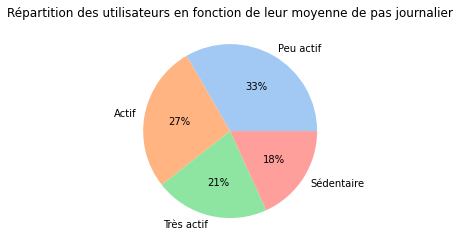

In [14]:

colors = sns.color_palette('pastel')[0:5]
plt.pie(freq['user_step_type'],labels = freq['index'],colors = colors, autopct='%.0f%%')
plt.title('Répartition des utilisateurs en fonction de leur moyenne de pas journalier')
plt.show()

Compréhension de la colonne 'LoggedActivitiesDistance', on compte le nombre de valeur non nulles en les rangeant dans 3 catégories différentes pour se rendre compte de la répartition. 

In [17]:
user.head()

,Id,TotalSteps,Calories,user_step_type,HourSleptAvg
0,1503960366,12116.741935,1816.419355,Très actif,6.004667
1,1624580081,5743.903226,1483.354839,Peu actif,NaN
2,1644430081,7282.966667,2811.300000,Peu actif,4.900000
3,1844505072,2580.064516,1573.483871,Sédentaire,10.866667
4,1927972279,916.129032,2172.806452,Sédentaire,6.950000


In [19]:
activity_step.loc[activity_step['LoggedActivitiesDistance']>0,'LoggedActivitiesDistance'].value_counts(ascending = True,bins = 3)

(2.954, 3.948]                  2
(3.948, 4.942]                 11
(1.9560000000000002, 2.954]    19
Name: LoggedActivitiesDistance, dtype: int64

In [18]:
activity_step.tail(5)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,jour_semaine,day_type,HourSleptAvg
935,8877689391,05/08/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,4,245,1174,2847,NaN,NaN,NaN,Sunday,Très active,NaN
936,8877689391,05/09/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,19,217,1131,3710,NaN,NaN,NaN,Monday,Très active,NaN
937,8877689391,05/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,11,224,1187,2832,NaN,NaN,NaN,Tuesday,Très active,NaN
938,8877689391,05/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,12,213,1127,3832,NaN,NaN,NaN,Wednesday,Très active,NaN
939,8877689391,05/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,...,1,137,770,1849,NaN,NaN,NaN,Thursday,Active,NaN


On va visualiser le nombre de pas et d'heure dormi moyen par jour de la semaine.

In [15]:
jour_semaine = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bar_step = activity_step[['jour_semaine','TotalSteps']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
print(bar_step)


  jour_semaine   TotalSteps
0       Monday  7819.082645
1      Tuesday  8125.006579
2    Wednesday  7559.373333
3     Thursday  7420.682432
4       Friday  7448.230159
5     Saturday  8202.712000
6       Sunday  6933.231405


Text(0, 0.5, 'nb de pas')

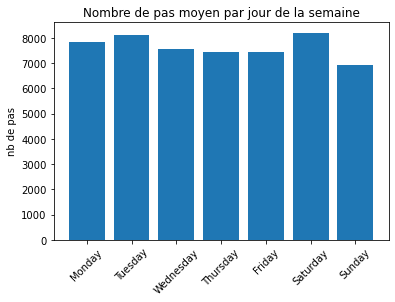

In [16]:
plt.bar(bar_step['jour_semaine'],bar_step['TotalSteps'])
plt.xticks(rotation = 45)
plt.title('Nombre de pas moyen par jour de la semaine')
plt.ylabel('nb de pas')

On veut essayer de regarder cette répartition pour les catégories d'utilisateur mentionné plus tôt. Pour ça on va filtrer notre data set en avance. On créé alors un nouveau dataset en faisant une jointure entre notre table activity_step et user, afin d'avoir nos informations user dans le même dataset.

In [64]:
ndata = pd.merge(activity_step,user, on = 'Id', how = 'left')
ndata = ndata.drop(columns=['TotalSteps_y', 'HourSleptAvg_y'])
ndata.tail()

,Id,date,TotalSteps_x,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,jour_semaine,day_type,HourSleptAvg_x,Calories_y,user_step_type
938,8877689391,05/08/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,1174,2847,NaN,NaN,NaN,Sunday,Très active,NaN,3420.258065,Très actif
939,8877689391,05/09/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,1131,3710,NaN,NaN,NaN,Monday,Très active,NaN,3420.258065,Très actif
940,8877689391,05/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,1187,2832,NaN,NaN,NaN,Tuesday,Très active,NaN,3420.258065,Très actif
941,8877689391,05/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,1127,3832,NaN,NaN,NaN,Wednesday,Très active,NaN,3420.258065,Très actif
942,8877689391,05/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,...,770,1849,NaN,NaN,NaN,Thursday,Active,NaN,3420.258065,Très actif


In [23]:
bar_step_sed = ndata.loc[ndata['user_step_type']=='Sédentaire',['jour_semaine','TotalSteps_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
print(bar_step_sed)

  jour_semaine  TotalSteps_x
0       Monday   1603.947368
1      Tuesday   2163.960000
2    Wednesday   2183.750000
3     Thursday   2282.666667
4       Friday   2341.047619
5     Saturday   2271.600000
6       Sunday   1417.157895


In [24]:
bar_step_pact = ndata.loc[ndata['user_step_type']=='Peu actif',['jour_semaine','TotalSteps_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
bar_step_act = ndata.loc[ndata['user_step_type']=='Actif',['jour_semaine','TotalSteps_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
bar_step_tact  = ndata.loc[ndata['user_step_type']=='Très actif',['jour_semaine','TotalSteps_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()

[(0.0, 14000.0)]

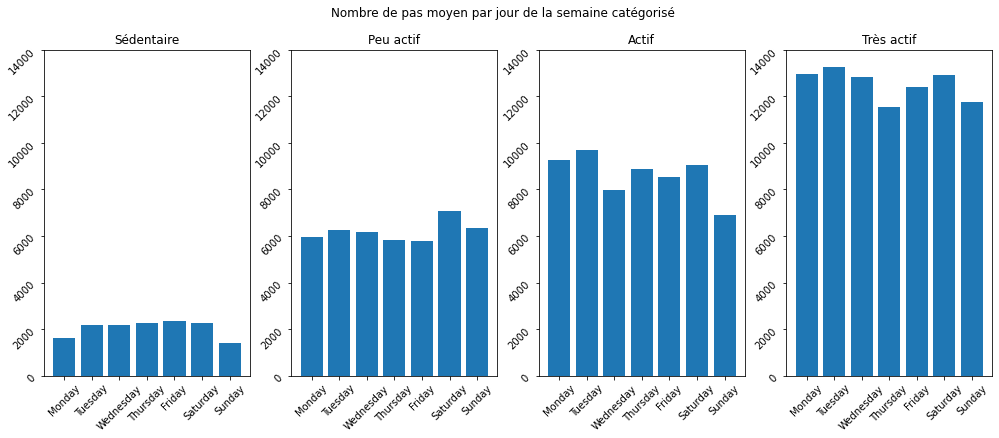

In [28]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(17,6))
fig.suptitle('Nombre de pas moyen par jour de la semaine catégorisé')

ax1.bar(bar_step_sed['jour_semaine'],bar_step_sed['TotalSteps_x'])
ax1.tick_params(labelrotation=45)
ax1.title.set_text('Sédentaire')
ax1.set(ylim=(0, 14000))
ax2.bar(bar_step_pact['jour_semaine'],bar_step_pact['TotalSteps_x'])
ax2.tick_params(labelrotation=45)
ax2.title.set_text('Peu actif')
ax2.set(ylim=(0, 14000))
ax3.bar(bar_step_act['jour_semaine'],bar_step_act['TotalSteps_x'])
ax3.tick_params(labelrotation=45)
ax3.title.set_text('Actif')
ax3.set(ylim=(0, 14000))
ax4.bar(bar_step_tact['jour_semaine'],bar_step_tact['TotalSteps_x'])
ax4.tick_params(labelrotation=45)
ax4.title.set_text('Très actif')
ax4.set(ylim=(0, 14000))

## Analyse ??

Nombre d'heure de sommeil

[(0.0, 10.0)]

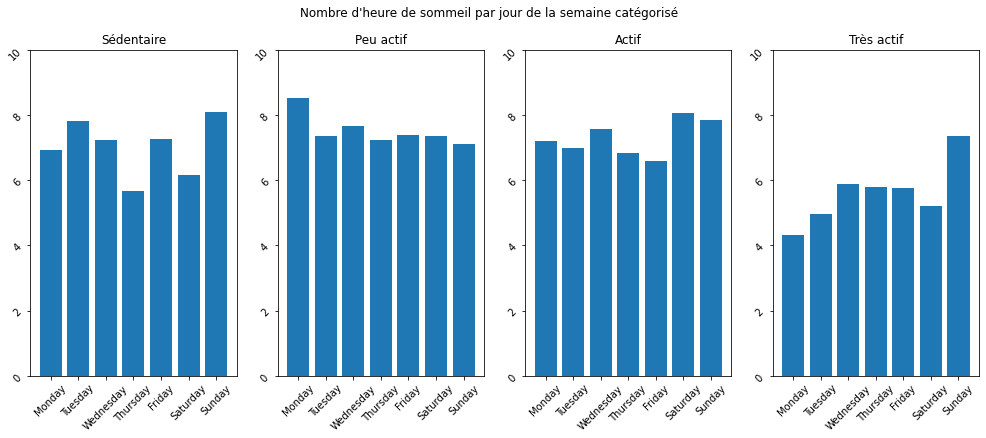

In [27]:
bar_sleep_sed = ndata.loc[ndata['user_step_type']=='Sédentaire',['jour_semaine','HourSleptAvg_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
bar_sleep_pact = ndata.loc[ndata['user_step_type']=='Peu actif',['jour_semaine','HourSleptAvg_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
bar_sleep_act = ndata.loc[ndata['user_step_type']=='Actif',['jour_semaine','HourSleptAvg_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()
bar_sleep_tact = ndata.loc[ndata['user_step_type']=='Très actif',['jour_semaine','HourSleptAvg_x']].groupby('jour_semaine').mean().reindex(jour_semaine).reset_index()

fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(17,6))
fig.suptitle("Nombre d'heure de sommeil par jour de la semaine catégorisé")

ax1.bar(bar_sleep_sed['jour_semaine'],bar_sleep_sed['HourSleptAvg_x'])
ax1.tick_params(labelrotation=45)
ax1.title.set_text('Sédentaire')
ax1.set(ylim=(0, 10))
ax2.bar(bar_sleep_pact['jour_semaine'],bar_sleep_pact['HourSleptAvg_x'])
ax2.tick_params(labelrotation=45)
ax2.title.set_text('Peu actif')
ax2.set(ylim=(0, 10))
ax3.bar(bar_sleep_act['jour_semaine'],bar_sleep_act['HourSleptAvg_x'])
ax3.tick_params(labelrotation=45)
ax3.title.set_text('Actif')
ax3.set(ylim=(0, 10))
ax4.bar(bar_sleep_tact['jour_semaine'],bar_sleep_tact['HourSleptAvg_x'])
ax4.tick_params(labelrotation=45)
ax4.title.set_text('Très actif')
ax4.set(ylim=(0, 10))

Classement utilisateur qui utilisent le plus la montre par jour.

In [29]:
ndata.head()

,Id,date,TotalSteps_x,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,jour_semaine,day_type,HourSleptAvg_x,Calories_y,user_step_type
0,1503960366,04/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,1.0,327.0,346.0,Tuesday,Très active,5.450000,1816.419355,Très actif
1,1503960366,04/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,2.0,384.0,407.0,Wednesday,Très active,6.400000,1816.419355,Très actif
2,1503960366,04/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1218,1776,NaN,NaN,NaN,Thursday,Active,NaN,1816.419355,Très actif
3,1503960366,04/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,1.0,412.0,442.0,Friday,Active,6.866667,1816.419355,Très actif
4,1503960366,04/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,2.0,340.0,367.0,Saturday,Très active,5.666667,1816.419355,Très actif


In [34]:
nbjour = ndata['date'].value_counts().shape[0]



In [24]:
freq_uti = ndata['Id'].value_counts().reset_index()
freq_uti['index']= freq_uti['index'].astype(str)
print(freq_uti)

         index  Id
0   4702921684  32
1   8378563200  32
2   4388161847  32
3   8053475328  31
4   1844505072  31
5   6962181067  31
6   8583815059  31
7   2873212765  31
8   4445114986  31
9   5553957443  31
10  8877689391  31
11  4319703577  31
12  4558609924  31
13  2320127002  31
14  1624580081  31
15  1927972279  31
16  2026352035  31
17  7086361926  31
18  1503960366  31
19  2022484408  31
20  4020332650  31
21  1644430081  30
22  3977333714  30
23  5577150313  30
24  6290855005  29
25  8792009665  29
26  6117666160  28
27  7007744171  26
28  6775888955  26
29  3372868164  20
30  8253242879  19
31  2347167796  18
32  4057192912   4


Text(0, 0.5, 'nb de pas')

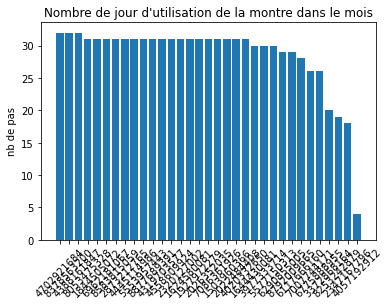

In [23]:
plt.bar(freq_uti['index'],freq_uti['Id'])
plt.xticks(rotation = 45)
plt.title("Nombre de jour d'utilisation de la montre dans le mois")
plt.ylabel('nb de pas')

In [31]:
conditions = [
    (freq_uti['Id'] > 25),
    (freq_uti['Id'] > 10) & (freq_uti['Id'] <= 25),
    (freq_uti['Id'] < 10)
    ]

values = ['top_user', 'mid_user', 'low_user']

freq_uti['cat'] = np.select(conditions, values)
freq_uti = freq_uti.rename(columns = {'index':'Id','Id':'day_used'})
print(freq_uti)

            Id  day_used       cat
0   4702921684        32  top_user
1   8378563200        32  top_user
2   4388161847        32  top_user
3   8053475328        31  top_user
4   1844505072        31  top_user
5   6962181067        31  top_user
6   8583815059        31  top_user
7   2873212765        31  top_user
8   4445114986        31  top_user
9   5553957443        31  top_user
10  8877689391        31  top_user
11  4319703577        31  top_user
12  4558609924        31  top_user
13  2320127002        31  top_user
14  1624580081        31  top_user
15  1927972279        31  top_user
16  2026352035        31  top_user
17  7086361926        31  top_user
18  1503960366        31  top_user
19  2022484408        31  top_user
20  4020332650        31  top_user
21  1644430081        30  top_user
22  3977333714        30  top_user
23  5577150313        30  top_user
24  6290855005        29  top_user
25  8792009665        29  top_user
26  6117666160        28  top_user
27  7007744171      

In [43]:
freq_uti['Id']= freq_uti['Id'].astype('int64')
nuser = pd.merge(user,freq_uti, on = 'Id', how = 'left')
ndata = ndata.drop(columns =['TotalDistance','TrackerDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance'])
ndata['UtilisationHeure'] = (ndata['VeryActiveMinutes'] + ndata['FairlyActiveMinutes'] + ndata['LightlyActiveMinutes'] + ndata['SedentaryMinutes'])/60
ndata.head()

,Id,date,TotalSteps_x,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,jour_semaine,day_type,HourSleptAvg_x,Calories_y,user_step_type,UtilisationHeure
0,1503960366,04/12/2016,13162,25,13,328,728,1985,1.0,327.0,346.0,Tuesday,Très active,5.450000,1816.419355,Très actif,18.233333
1,1503960366,04/13/2016,10735,21,19,217,776,1797,2.0,384.0,407.0,Wednesday,Très active,6.400000,1816.419355,Très actif,17.216667
2,1503960366,04/14/2016,10460,30,11,181,1218,1776,NaN,NaN,NaN,Thursday,Active,NaN,1816.419355,Très actif,24.000000
3,1503960366,04/15/2016,9762,29,34,209,726,1745,1.0,412.0,442.0,Friday,Active,6.866667,1816.419355,Très actif,16.633333
4,1503960366,04/16/2016,12669,36,10,221,773,1863,2.0,340.0,367.0,Saturday,Très active,5.666667,1816.419355,Très actif,17.333333


On a créé un dernier datadrame regroupant les informations du nombre d'heure d'utilisation de la montre par jour.

In [44]:
nuser.head()

,Id,TotalSteps,Calories,user_step_type,HourSleptAvg,day_used,cat
0,1503960366,12116.741935,1816.419355,Très actif,6.004667,31,top_user
1,1624580081,5743.903226,1483.354839,Peu actif,NaN,31,top_user
2,1644430081,7282.966667,2811.300000,Peu actif,4.900000,30,top_user
3,1844505072,2580.064516,1573.483871,Sédentaire,10.866667,31,top_user
4,1927972279,916.129032,2172.806452,Sédentaire,6.950000,31,top_user


In [53]:
moyenne_heure_utilisation = ndata[['Id','UtilisationHeure']].groupby('Id').mean().reset_index()
nuser = pd.merge(nuser,moyenne_heure_utilisation, on ='Id', how='left')
print(nuser)

            Id    TotalSteps     Calories user_step_type  HourSleptAvg  \
0   1503960366  12116.741935  1816.419355     Très actif      6.004667   
1   1624580081   5743.903226  1483.354839      Peu actif           NaN   
2   1644430081   7282.966667  2811.300000      Peu actif      4.900000   
3   1844505072   2580.064516  1573.483871     Sédentaire     10.866667   
4   1927972279    916.129032  2172.806452     Sédentaire      6.950000   
5   2022484408  11370.645161  2509.967742     Très actif           NaN   
6   2026352035   5566.870968  1540.645161      Peu actif      8.436310   
7   2320127002   4716.870968  1724.161290      Peu actif      1.016667   
8   2347167796   9519.666667  2043.444444          Actif      7.446667   
9   2873212765   7555.774194  1916.967742          Actif           NaN   
10  3372868164   6861.650000  1933.100000      Peu actif           NaN   
11  3977333714  10984.566667  1513.666667     Très actif      4.894048   
12  4020332650   2267.225806  2385.806

In [59]:
nuser['UtilisationHeure'].value_counts(bins=3).reset_index()

,index,UtilisationHeure
0,"(21.051, 23.985]",18
1,"(15.173, 18.117]",11
2,"(18.117, 21.051]",4


In [65]:
conditions = [
    (nuser['UtilisationHeure'] > 23),
    (nuser['UtilisationHeure'] > 17) & (nuser['UtilisationHeure'] <= 23),
    (nuser['UtilisationHeure'] < 17)
    ]

values = ['toute la journée', 'Sauf la nuit', 'moins utilisé']

nuser['cat_utilisation'] = np.select(conditions, values)
print(nuser)

            Id    TotalSteps     Calories user_step_type  HourSleptAvg  \
0   1503960366  12116.741935  1816.419355     Très actif      6.004667   
1   1624580081   5743.903226  1483.354839      Peu actif           NaN   
2   1644430081   7282.966667  2811.300000      Peu actif      4.900000   
3   1844505072   2580.064516  1573.483871     Sédentaire     10.866667   
4   1927972279    916.129032  2172.806452     Sédentaire      6.950000   
5   2022484408  11370.645161  2509.967742     Très actif           NaN   
6   2026352035   5566.870968  1540.645161      Peu actif      8.436310   
7   2320127002   4716.870968  1724.161290      Peu actif      1.016667   
8   2347167796   9519.666667  2043.444444          Actif      7.446667   
9   2873212765   7555.774194  1916.967742          Actif           NaN   
10  3372868164   6861.650000  1933.100000      Peu actif           NaN   
11  3977333714  10984.566667  1513.666667     Très actif      4.894048   
12  4020332650   2267.225806  2385.806

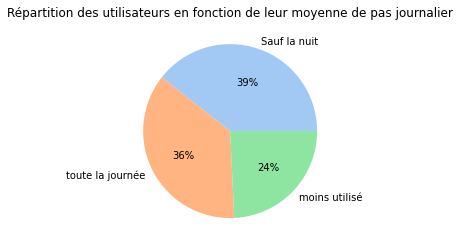

In [71]:
freq_uti = nuser['cat_utilisation'].value_counts().reset_index()


colors = sns.color_palette('pastel')[0:5]
plt.pie(freq_uti['cat_utilisation'],labels = freq_uti['index'],colors = colors, autopct='%.0f%%')
plt.title('Répartition des utilisateurs en fonction de leur moyenne de pas journalier')
plt.show()

In [101]:
freq_uti_top = nuser.loc[nuser['cat']=='top_user',['cat_utilisation']].value_counts().reset_index()
freq_uti_top.columns = ['cat_utilisation', 'nb']


Index(['cat_utilisation', 'nb'], dtype='object')

In [102]:
freq_uti_mid = nuser.loc[nuser['cat']=='mid_user',['cat_utilisation']].value_counts().reset_index()
freq_uti_mid.columns = ['cat_utilisation', 'nb']
freq_uti_low = nuser.loc[nuser['cat']=='low_user',['cat_utilisation']].value_counts().reset_index()
freq_uti_low.columns = ['cat_utilisation', 'nb']

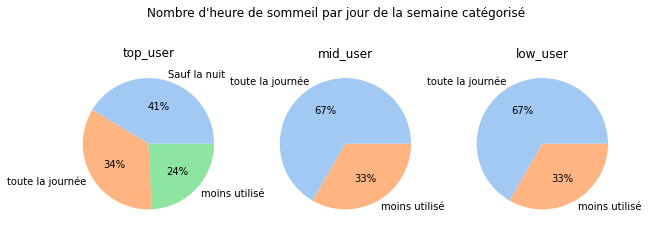

In [113]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Nombre d'heure de sommeil par jour de la semaine catégorisé")

ax1.pie(freq_uti_top['nb'],labels = freq_uti_top['cat_utilisation'],colors = colors, autopct='%.0f%%')
ax1.title.set_text('top_user')


ax2.pie(freq_uti_mid['nb'],labels = freq_uti_mid['cat_utilisation'],colors = colors, autopct='%.0f%%')

ax2.title.set_text('mid_user')


ax3.pie(freq_uti_mid['nb'],labels = freq_uti_mid['cat_utilisation'],colors = colors, autopct='%.0f%%')

ax3.title.set_text('low_user')



Malheureusement on n'obtient des résultats qui ne semblent pas très concluant. Il y a trop peu de personnes dans les catégories mid et low user.

## Conclusion 

La mission Bellabeat est de procurer au femme des données pour qu'elles puissent suivre leur variables quotidiennes.

Afin de produire une analyse de qualité un premier conseil est d'utiliser les propres données de Bellabeat afin d'avoir un plus large dataset. Cela permettrait de s'affranchir de problème de biais d'échantillonage. Surtout que nos cibles sont des femmes et les données utilisés ne donnent pas d'informations démographiques sur les utilisateurs. 

De notre analyses on peut tirer quelques conseils pour aider la campagne de publicité et améliorer l'application Bellabeat.

- Proposer des notifications sur les objectifs de pas mais aussi la publication de posts sur les réseaux sociaux pour promouvoir l'activité des utilisateurs et construire une communauté engagée
- Proposer un autre type de notification, notamment pour les horaires de coucher. L'utilisateur fixe des horaires de coucher et reçois une notification 30 minutes avant pour qu'il soit prévenu qu'il faut aller se préparer. 
- Proposer un système de récompense notamment sur le nombre de minutes intensives et le nombre de pas journaliers en adéquation avec le programme sportif. Cela permettrait de fidéliser les utilisateurs les plus actifs en leur proposant des promotions spéciales. 